# Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Web scrapping
import requests
from bs4 import BeautifulSoup

import re

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [9]:
df = pd.read_csv('premier-league-matches.csv')
df.head(10)

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
5,1993,1,1992-08-15,Ipswich Town,1,1,Aston Villa,D
6,1993,1,1992-08-15,Everton,1,1,Sheffield Weds,D
7,1993,1,1992-08-15,Southampton,0,0,Tottenham,D
8,1993,1,1992-08-15,Chelsea,1,1,Oldham Athletic,D
9,1993,1,1992-08-16,Nott'ham Forest,1,0,Liverpool,H


In [10]:
df.tail(10)

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
12016,2023,38,2023-05-28,Crystal Palace,1,1,Nott'ham Forest,D
12017,2023,38,2023-05-28,Chelsea,1,1,Newcastle Utd,D
12018,2023,38,2023-05-28,Manchester Utd,2,1,Fulham,H
12019,2023,38,2023-05-28,Arsenal,5,0,Wolves,H
12020,2023,38,2023-05-28,Southampton,4,4,Liverpool,D
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A
12025,2023,38,2023-05-28,Brentford,1,0,Manchester City,H


In [13]:
# Basic summary statistics
total_matches = df.shape[0]
result_distribution = df['FTR'].value_counts()
average_goals_per_match = round((df['HomeGoals'] + df['AwayGoals']).mean(),2)

# Display the results
summary_stats = {
    "Total Matches": total_matches,
    "Result Distribution": result_distribution.to_dict(),
    "Average Goals per Match": average_goals_per_match
}

summary_stats

{'Total Matches': 12026,
 'Result Distribution': {'H': 5519, 'A': 3410, 'D': 3097},
 'Average Goals per Match': 2.67}

In [16]:
# Group by Season_End_Year and count the number of matches
matches_per_season = df.groupby('Season_End_Year').size()

# Convert the Series to a DataFrame for better visualization
matches_per_season_df = matches_per_season.reset_index(name='Number of Matches')

matches_per_season_df


,Season_End_Year,Number of Matches
0,1993,462
1,1994,462
2,1995,462
3,1996,380
4,1997,380
5,1998,380
6,1999,380
7,2000,380
8,2001,380
9,2002,380


In [17]:
# Create a new column to categorize the result as Home Win, Away Win, or Draw
df['Result_Category'] = df['FTR'].map({'H': 'Home Win', 'A': 'Away Win', 'D': 'Draw'})

# Group by Season_End_Year and Result_Category, then count occurrences
win_ratios = df.groupby(['Season_End_Year', 'Result_Category']).size().unstack().fillna(0)

# Calculate the ratio of each result category by dividing by the total number of matches per season
win_ratios = win_ratios.div(win_ratios.sum(axis=1), axis=0)

win_ratios


Result_Category,Away Win,Draw,Home Win
Season_End_Year,,,
1993,0.255411,0.281385,0.463203
1994,0.277056,0.307359,0.415584
1995,0.266234,0.290043,0.443723
1996,0.252632,0.257895,0.489474
1997,0.260526,0.313158,0.426316
1998,0.265789,0.250000,0.484211
1999,0.252632,0.302632,0.444737
2000,0.265789,0.242105,0.492105
2001,0.250000,0.265789,0.484211


In [18]:
# Calculate total goals scored per season
goals_per_season = df.groupby('Season_End_Year')[['HomeGoals', 'AwayGoals']].sum()

# Calculate average goals per match for each season
goals_per_season['Average Goals per Match'] = (goals_per_season['HomeGoals'] + goals_per_season['AwayGoals']) / matches_per_season

goals_per_season


,HomeGoals,AwayGoals,Average Goals per Match
Season_End_Year,,,
1993,723,499,2.645022
1994,663,532,2.586580
1995,697,498,2.586580
1996,580,408,2.600000
1997,559,411,2.552632
1998,592,427,2.681579
1999,553,406,2.523684
2000,635,425,2.789474
2001,587,405,2.610526


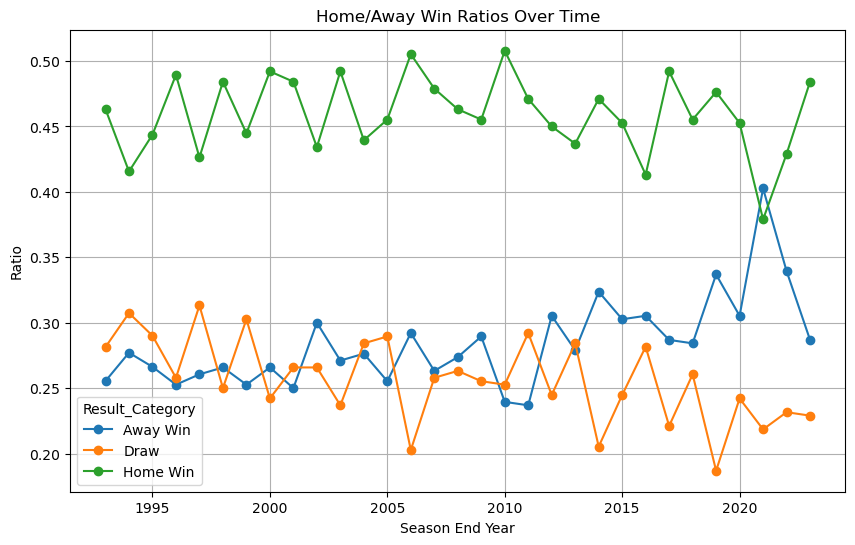

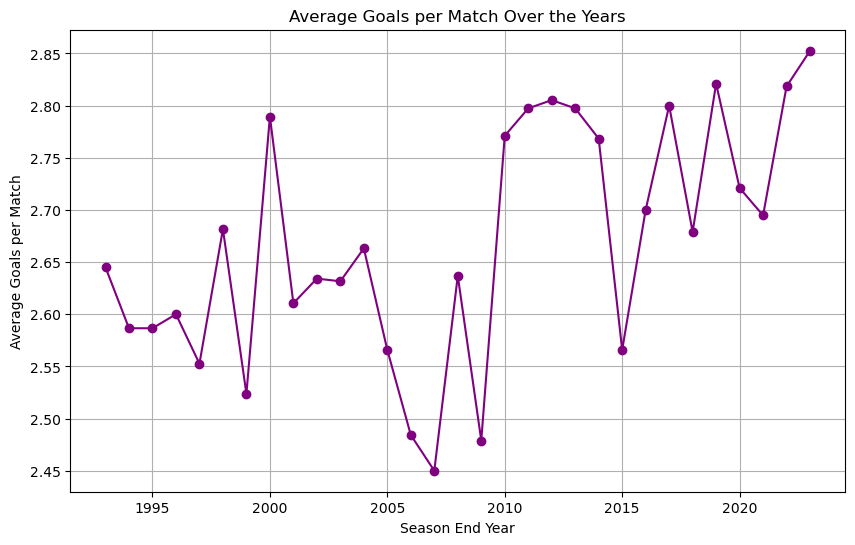

In [20]:

# Plotting the number of matches per season


# Plotting the home/away win ratios over time
win_ratios.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Home/Away Win Ratios Over Time')
plt.xlabel('Season End Year')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()

# Plotting the average goals per match over time
plt.figure(figsize=(10, 6))
plt.plot(goals_per_season.index, goals_per_season['Average Goals per Match'], marker='o', color='purple')
plt.title('Average Goals per Match Over the Years')
plt.xlabel('Season End Year')
plt.ylabel('Average Goals per Match')
plt.grid(True)
plt.show()


In [ ]:
win_ratios['Home Team Advantage'] = 

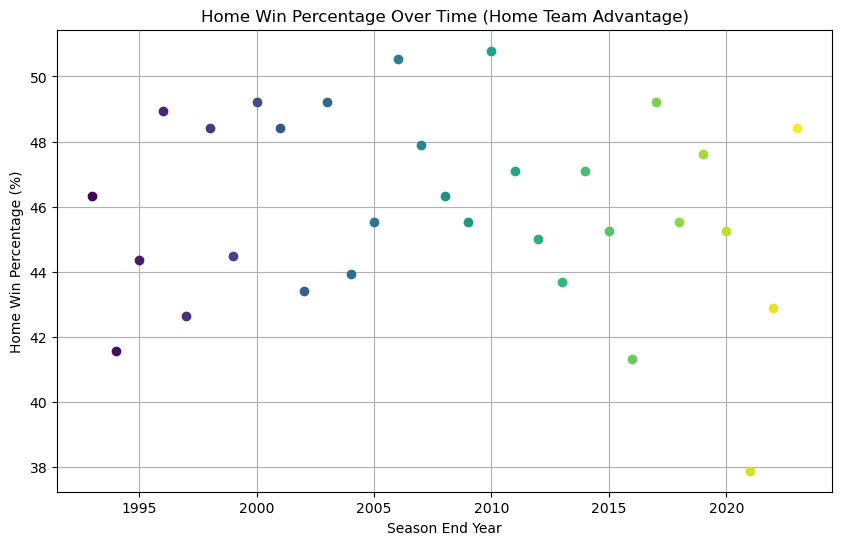

In [26]:

# Calculate the number of home wins per season
home_wins_per_season = df[df['FTR'] == 'H'].groupby('Season_End_Year').size()

# Calculate the total number of matches per season (which we already did)
matches_per_season = df.groupby('Season_End_Year').size()

# Calculate the percentage of home wins per season
home_win_percentage = (home_wins_per_season / matches_per_season) * 100

# Plotting the home win percentage over time
# Generate a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(home_win_percentage)))

# Plotting the home win percentage over time with different colored dots
plt.figure(figsize=(10, 6))
for i, year in enumerate(home_win_percentage.index):
    plt.plot(year, home_win_percentage.iloc[i], marker='o', color=colors[i])

plt.title('Home Win Percentage Over Time (Home Team Advantage)')
plt.xlabel('Season End Year')
plt.ylabel('Home Win Percentage (%)')
plt.grid(True)
plt.show()

# Webscrapping to get the season end winners

In [64]:
# Step 1: Send a request to the webpage
url = "https://en.wikipedia.org/wiki/List_of_English_football_champions"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Step 2: Locate the header for "Premier League (1992–present)"
header = soup.find('span', id='Premier_League_.281992.E2.80.93present.29')


# Step 3: Find the table that comes after this header
table = header.find_next('table', {'class': 'wikitable sortable'})

In [67]:
# Step 3: Extract the data from the table
data = []
rows = table.find_all('tr')
for row in rows[1:]:  # Skip the header row
    cells = row.find_all('td')
    if len(cells) > 1:
        season = cells[0].get_text(strip=True)  # Extract season
        champion = cells[1].get_text(strip=True)  # Extract champion
        runners = cells[2].get_text(strip=True)
        # Filter data to include only from 1992/93 to 2023/24
        if '–' in season:  # Check if the season contains a dash (which indicates a range of years)
            start_year = int(season.split('–')[0])
            if 1992 <= start_year <= 2023:
                data.append([season, champion, runners])

# Step 4: Create a DataFrame to store the data
df_winners = pd.DataFrame(data, columns=['Season', 'Champion','Runners'])

In [68]:
# Display the scraped data
df_winners.head(5)

,Season,Champion,Runners
0,1992–93,Manchester United(8),Aston Villa(10)
1,1993–94,Manchester United[b](9),Blackburn Rovers(1)
2,1994–95,Blackburn Rovers(3),Manchester United(11)
3,1995–96,Manchester United[b](10),Newcastle United(1)
4,1996–97,Manchester United(11),Newcastle United(2)


In [69]:

# Function to correct the season format
def correct_season_format(season):
    # Extract the last two digits (e.g., '93' from '1992–93') and convert to full year
    years = season.split('–')
    if len(years) > 1:
        end_year_last_two_digits = years[1].strip()
        # Determine the century prefix ('19' for '93' to '99', '20' for '00' to '50')
        if int(end_year_last_two_digits) >= 90:
            full_year = '19' + end_year_last_two_digits
        else:
            full_year = '20' + end_year_last_two_digits
    else:
        full_year = years[0].strip()  # In case there's no split, just return the year as is
    return full_year

# Function to clean up annotations and numbers in parentheses
def clean_text(text):
    # Remove annotations like [b], [i], etc.
    text = re.sub(r'\[.*?\]', '', text)
    # Remove numbers in parentheses, e.g., (8)
    text = re.sub(r'\(\d+\)', '', text)
    return text.strip()

In [70]:
# Correct the Season format
df_winners['Season'] = df_winners['Season'].apply(correct_season_format)

# Clean the Champion and Runners columns
df_winners['Champion'] = df_winners['Champion'].apply(clean_text)
df_winners['Runners'] = df_winners['Runners'].apply(clean_text)

# Display the cleaned data
df_winners

,Season,Champion,Runners
0,1993,Manchester United,Aston Villa
1,1994,Manchester United,Blackburn Rovers
2,1995,Blackburn Rovers,Manchester United
3,1996,Manchester United,Newcastle United
4,1997,Manchester United,Newcastle United
5,1998,Arsenal,Manchester United
6,1999,Manchester United,Arsenal
7,2000,Manchester United,Arsenal
8,2001,Manchester United,Arsenal
9,2002,Arsenal,Liverpool


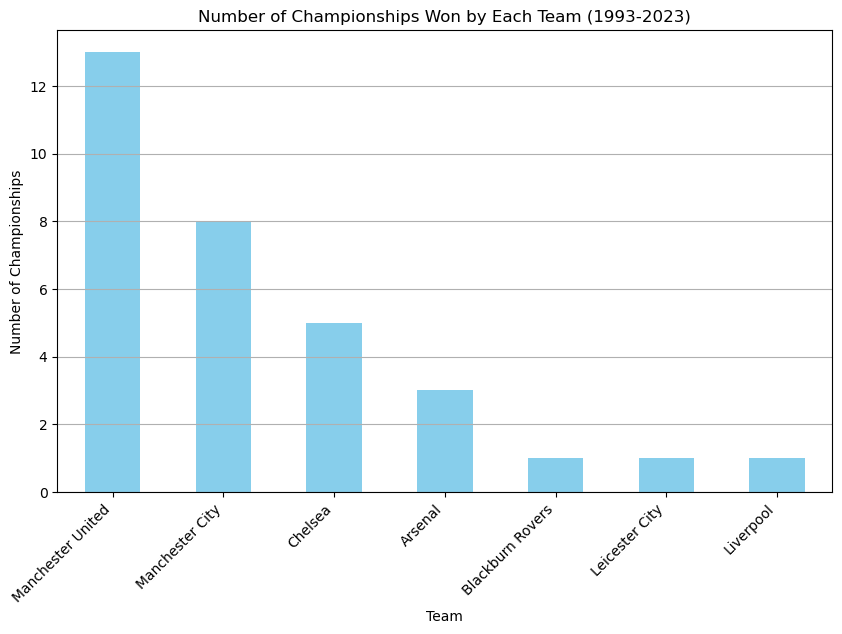

In [71]:
# Count the number of championships won by each team
champion_counts = df_winners['Champion'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
champion_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Championships Won by Each Team (1993-2023)')
plt.xlabel('Team')
plt.ylabel('Number of Championships')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Show the plot
plt.show()

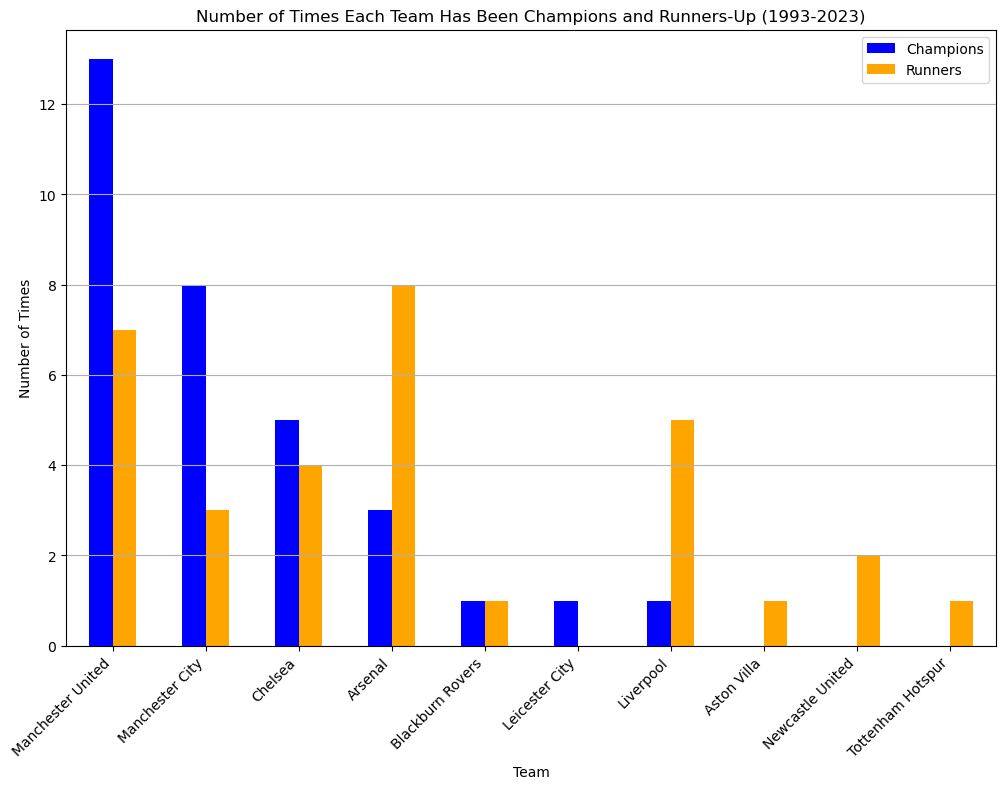

In [72]:
runners_counts = df_winners['Runners'].value_counts()

# Create a DataFrame to hold the counts for both categories
combined_counts = pd.DataFrame({
    'Champions': champion_counts,
    'Runners': runners_counts
}).fillna(0)  # Fill NaN with 0 where a team has not been in a category

# Sort the DataFrame by the number of championships for better visualization
combined_counts = combined_counts.sort_values('Champions', ascending=False)

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
combined_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'], ax=plt.gca())
plt.title('Number of Times Each Team Has Been Champions and Runners-Up (1993-2023)')
plt.xlabel('Team')
plt.ylabel('Number of Times')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Show the plot
plt.show()

In [73]:
# Save the web-scraped data (df_winners) as a CSV file
df_winners.to_csv('epl_champions_runners_1993_2023.csv', index=False)

print("Web-scraped data has been saved as 'epl_champions_runners_1993_2023.csv'.")


Web-scraped data has been saved as 'epl_champions_runners_1993_2023.csv'.


In [ ]:
# Rename the Season column in df_winners for clarity
df_winners.rename(columns={'Season': 'Season_End_Year'}, inplace=True)

# Ensure Season_End_Year in df_winners is an integer
df_winners['Season_End_Year'] = df_winners['Season_End_Year'].astype(int)

# Merge the data on Season_End_Year
df_combined = pd.merge(df_matches, df_winners, on='Season_End_Year', how='left')

# Display the merged DataFrame to check the result
df_combined.head()

# Perform analysis on the combined data
# Example: Analyze match outcomes where the home team was the champion or runner-up
home_team_champion = df_combined[df_combined['Home'] == df_combined['Champion']]
home_team_runner_up = df_combined[df_combined['Home'] == df_combined['Runners']]

# Calculate the win rates for home teams that were champions or runners-up
home_team_champion_win_rate = (home_team_champion['FTR'] == 'H').mean()
home_team_runner_up_win_rate = (home_team_runner_up['FTR'] == 'H').mean()

# Print the insights
print(f"Win rate for home teams that were champions: {home_team_champion_win_rate:.2%}")
print(f"Win rate for home teams that were runners-up: {home_team_runner_up_win_rate:.2%}")

# You can also visualize this information
import matplotlib.pyplot as plt

# Create a bar plot for the win rates
win_rates = pd.Series({
    'Champion Home Team Win Rate': home_team_champion_win_rate,
    'Runner-Up Home Team Win Rate': home_team_runner_up_win_rate
})

win_rates.plot(kind='bar', color=['green', 'red'], figsize=(8, 6))
plt.title('Home Team Win Rates for Champions and Runners-Up (1993-2023)')
plt.ylabel('Win Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [109]:
# Group by 'Season_End_Year' and aggregate statistics
df_yearly = df.groupby('Season_End_Year').agg({
    'Home': 'count',  # Total matches
    'HomeGoals': 'sum',  # Total home goals
    'AwayGoals': 'sum',  # Total away goals
    'FTR': lambda x: (x == 'H').sum(),  # Home wins
}).rename(columns={'Home': 'Total_Matches', 'HomeGoals': 'Total_HomeGoals', 'AwayGoals': 'Total_AwayGoals', 'FTR': 'Home_Wins'})

# Calculate additional statistics
df_yearly['Away_Wins'] = df.groupby('Season_End_Year')['FTR'].apply(lambda x: (x == 'A').sum())
df_yearly['Draws'] = df.groupby('Season_End_Year')['FTR'].apply(lambda x: (x == 'D').sum())
df_yearly['Total_Goals'] = df_yearly['Total_HomeGoals'] + df_yearly['Total_AwayGoals']
df_yearly.tail()

,Total_Matches,Total_HomeGoals,Total_AwayGoals,Home_Wins,Away_Wins,Draws,Total_Goals
Season_End_Year,,,,,,,
2019,380,596,476,181,128,71,1072
2020,380,576,458,172,116,92,1034
2021,380,514,510,144,153,83,1024
2022,380,575,496,163,129,88,1071
2023,380,621,463,184,109,87,1084


## Adding the data for season end 2024 as the data was missing in csv

In [110]:
# New row of data for 2024
new_data = pd.DataFrame({
    'Total_Matches': [380],
    'Total_HomeGoals': [684],
    'Total_AwayGoals': [562],
    'Home_Wins': [175],
    'Away_Wins': [123],
    'Draws': [82],
    'Total_Goals': [1246]
}, index=[2024])

# Append the new row to the df_yearly DataFrame
df_yearly = pd.concat([df_yearly, new_data])


In [112]:
df_yearly.index.name = 'Season_End_Year'
df_yearly.tail()
#df_winners.tail()

,Total_Matches,Total_HomeGoals,Total_AwayGoals,Home_Wins,Away_Wins,Draws,Total_Goals
Season_End_Year,,,,,,,
2020,380,576,458,172,116,92,1034
2021,380,514,510,144,153,83,1024
2022,380,575,496,163,129,88,1071
2023,380,621,463,184,109,87,1084
2024,380,684,562,175,123,82,1246


In [113]:

# Reset index to make Season_End_Year a column
df_yearly.reset_index(inplace=True)

# Convert 'Season' in df_winners to integer
df_winners['Season'] = df_winners['Season'].astype(int)

# Merge the aggregated match data with the champions/runners data
df_combined_yearly = pd.merge(df_yearly, df_winners, left_on='Season_End_Year', right_on='Season', how='inner')

# Drop the duplicate 'Season' column
df_combined_yearly.drop(columns=['Season'], inplace=True)

# Display the combined DataFrame to check the result
df_combined_yearly.tail()

,Season_End_Year,Total_Matches,Total_HomeGoals,Total_AwayGoals,Home_Wins,Away_Wins,Draws,Total_Goals,Champion,Runners
27,2020,380,576,458,172,116,92,1034,Liverpool,Manchester City
28,2021,380,514,510,144,153,83,1024,Manchester City,Manchester United
29,2022,380,575,496,163,129,88,1071,Manchester City,Liverpool
30,2023,380,621,463,184,109,87,1084,Manchester City,Arsenal
31,2024,380,684,562,175,123,82,1246,Manchester City,Arsenal


In [115]:
# Save the web-scraped data (df_winners) as a CSV file
df_combined_yearly.to_csv('epl_season_1993_2024.csv', index=False)

print("Combined data has been saved as 'epl_season_1993_2023.csv'.")


Combined data has been saved as 'epl_season_1993_2023.csv'.
